In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage.filters import gaussian_filter
from scipy.fftpack import fft
import scipy
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import normalize
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

/var/folders/fv/h9_lxk054n57rszn53prlstr0000gn/T/ipykernel_47938/276732249.py:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal #not using  
from scipy.ndimage.filters import gaussian_filter
from scipy.fftpack import fft
import scipy
import seaborn as sns
#multi cascade cn 
import sklearn.linear_model as lm
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence
import sklearn.preprocessing as pproc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import normalize
from imblearn.over_sampling import RandomOverSampler

In [2]:
data_train = pd.read_csv('exoTrain.csv')
data_test = pd.read_csv('exoTest.csv')

In [3]:
data_train 

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [4]:
#NO null values present in our dataset 

PERMUTE THE DATASET

In [5]:
data_train = np.random.permutation(np.asarray(data_train))
data_test = np.random.permutation(np.asarray(data_test))

GEt the label column

In [6]:
y1 = data_train[:,0]
y2 = data_test[:,0]

In [7]:
#MIN-MAX NORMALIZATION ON Y COLUMNS

y_train = (y1 - min(y1))/ (max(y1)- min(y1))
y_test = (y2- min(y2))/ (max(y2)- min(y2))

data_train = np.delete(data_train,1,1)
data_test = np.delete(data_test,1,1)

In [8]:
time = np.arange(len(data_train[0]))*(36/60) #time in hour

# generating a time sequence from 0 to len(data_train[0]) - 1 
# and converting it to hours is a way to establish a time axis that allows you 
# to relate your flux measurements to specific points in time,making it easier to analyze 
# and understand the data.

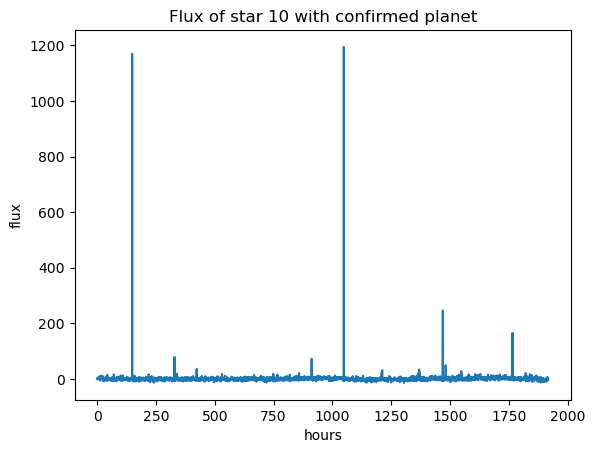

In [9]:
plt.figure()
plt.title('Flux of star 10 with confirmed planet')
plt.ylabel('flux')
plt.xlabel('hours')
plt.plot(time, data_train[10])

In [10]:
data_train_norm = normalize(data_train)
data_test_norm = normalize(data_test)

In [11]:
data_train_norm

array([[ 2.43365641e-04,  3.78506582e-02,  4.10314471e-02, ...,
        -1.05815381e-02, -1.36941846e-02, -1.34386507e-02],
       [ 6.29736597e-05, -1.90517991e-01, -1.78888645e-01, ...,
        -4.24316519e-03, -1.06375106e-02, -7.69475148e-03],
       [ 1.49318210e-04,  1.81884512e-02,  2.25978180e-02, ...,
        -5.74725792e-03,  2.09045495e-03, -1.24456728e-02],
       ...,
       [ 4.74531824e-04, -1.05630784e-02,  4.29925833e-03, ...,
        -3.89116096e-04,  3.98606733e-04,  1.88389134e-03],
       [ 3.49279629e-04,  1.45740418e-01,  1.31507273e-01, ...,
        -9.62963937e-03, -2.64753959e-03, -4.49173603e-03],
       [ 5.93198965e-04, -4.16366353e-02, -2.22330972e-02, ...,
         8.83866458e-04,  1.20834629e-02,  7.68192660e-03]])

In [12]:
def gauss_filter(dataset,sigma):
    
    dts = [] #for filtered data
    for x in range(dataset.shape[0]):
        dts.append(gaussian_filter(dataset[x],sigma))
        
    return np.asarray(dts)

#sigma smoothes each data point 

In [13]:
#applying the filter 
data_train_gaussian = gauss_filter(data_train_norm,7.0)
data_test_gaussian = gauss_filter(data_test_norm,7.0)

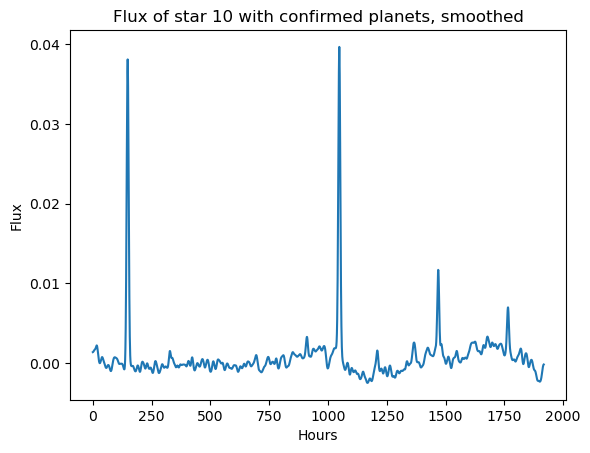

In [14]:
#print the light curves smoothed
plt.figure()
plt.title('Flux of star 10 with confirmed planets, smoothed')
plt.ylabel('Flux')
plt.xlabel('Hours')
plt.plot( time , data_train_gaussian[10])

In [15]:
#we will now apply fast fourier transform to the smoothed data
frequency = np.arange(len(data_train[0])) * (1/36 * 60)     #the frequencies corresponding to the data points in your time series. It's important to have frequency information to understand how different components in your time series data relate to different oscillations or periodic patterns. The formula (1/36 * 60) is used to convert the time units to cycles per hour.

data_train_fft1 = scipy.fft.fft2(data_train_norm, axes=1)
data_test_fft1 = scipy.fft.fft2(data_test_norm, axes = 1 )

data_train_fft = np.abs(data_train_fft1)
data_test_fft = np.abs(data_test_fft1)

In [16]:
len_seq = len(data_train_fft[0])

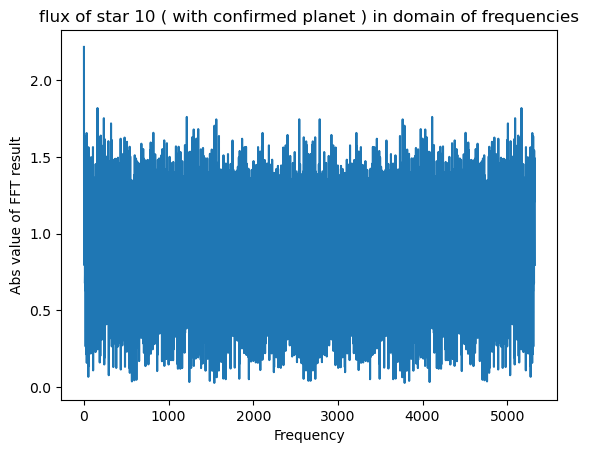

In [17]:
plt.figure()
plt.title('flux of star 10 ( with confirmed planet ) in domain of frequencies')
plt.ylabel('Abs value of FFT result')
plt.xlabel('Frequency')
plt.plot(frequency,data_train_fft[10])

In [18]:
rm = RandomOverSampler(sampling_strategy = 0.5)
data_train_ovs,y_train_ovs = rm.fit_resample(data_train_fft,y_train)

In [19]:
#recap dataset after oversampling
print("After oversampling, counts of label '1': {}".format(sum(y_train_ovs==1)))
print("After oversampling, counts of label '0': {}".format(sum(y_train_ovs==0)))

After oversampling, counts of label '1': 2525
After oversampling, counts of label '0': 5050


In [20]:
##RESHAPING FOR NN 

data_train_ovs = np.asarray(data_train_ovs)
data_test_fft = np.asarray(data_test_fft)

data_train_ovs_nn = data_train_ovs.reshape((data_train_ovs.shape[0], data_train_ovs.shape[1],1))
data_test_fft_nn = data_test_fft.reshape((data_test_fft.shape[0], data_test_fft.shape[1],1))

In [21]:
def mycnn(len_seq):
    
    model = tf.keras.Sequential()
    
    model.add(layers.Conv1D(filters = 256,kernel_size = 8 ,activation = 'relu', input_shape = (len_seq,1)))
    model.add(layers.MaxPool1D(strides = 5))
    model.add(layers.BatchNormalization()) #As the network trains, the distribution of values in each layer can change. Batch normalization ensures that the mean and variance of each layer's activations remain consistent during training. This helps with faster convergence and reduces the chances of the network getting stuck in training.
    
    model.add(layers.Conv1D(filters = 340, kernel_size = 6,activation = 'relu'))
    model.add(layers.MaxPool1D(strides = 5))
    model.add(layers.BatchNormalization())
    
    
    model.add(layers.Conv1D(filters = 256, kernel_size = 4,activation = 'relu'))
    model.add(layers.MaxPool1D(strides = 5))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3)) #Dropout helps prevent overfitting by randomly deactivating a fraction of neurons during training.
    
    
    model.add(layers.Dense(24,activation='relu'))
    
    model.add(layers.Dense(12,activation='relu'))
    
    model.add(layers.Dense(8,activation='relu'))
    
    model.add(layers.Dense(1,activation='sigmoid'))
    return model

In [22]:
model = mycnn(len_seq)
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])



2023-12-02 00:18:04.386175: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-02 00:18:04.386482: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-02 00:18:04.386490: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-02 00:18:04.386875: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-02 00:18:04.387541: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
history = model.fit(data_train_ovs_nn, y_train_ovs , epochs=15, batch_size = 10, validation_data=(data_test_fft_nn, y_test))

Epoch 1/15


2023-12-02 00:18:05.564027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


758/758 [==============================] - ETA: 0s - loss: 1.2602 - accuracy: 0.8536

2023-12-02 00:18:40.657898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


758/758 [==============================] - 36s 46ms/step - loss: 1.2602 - accuracy: 0.8536 - val_loss: 0.8112 - val_accuracy: 0.9561
Epoch 2/15
758/758 [==============================] - 35s 46ms/step - loss: 2.7516 - accuracy: 0.9096 - val_loss: 37.4269 - val_accuracy: 0.3842
Epoch 3/15
758/758 [==============================] - 34s 44ms/step - loss: 170.8297 - accuracy: 0.8077 - val_loss: 47.7716 - val_accuracy: 0.9175
Epoch 4/15
758/758 [==============================] - 33s 44ms/step - loss: 564.3385 - accuracy: 0.8367 - val_loss: 892.4495 - val_accuracy: 0.7544
Epoch 5/15
758/758 [==============================] - 33s 44ms/step - loss: 989.0418 - accuracy: 0.8815 - val_loss: 522.5196 - val_accuracy: 0.8947
Epoch 6/15
758/758 [==============================] - 34s 45ms/step - loss: 2338.0366 - accuracy: 0.8815 - val_loss: 10410.7197 - val_accuracy: 0.6912
Epoch 7/15
758/758 [==============================] - 34s 45ms/step - loss: 4416.6870 - accuracy: 0.8891 - val_loss: 30322.9121 

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3190, 256)         2304      
                                                                 
 max_pooling1d (MaxPooling1  (None, 638, 256)          0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 638, 256)          1024      
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 633, 340)          522580    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 127, 340)          0         
 g1D)                                                            
                                                        

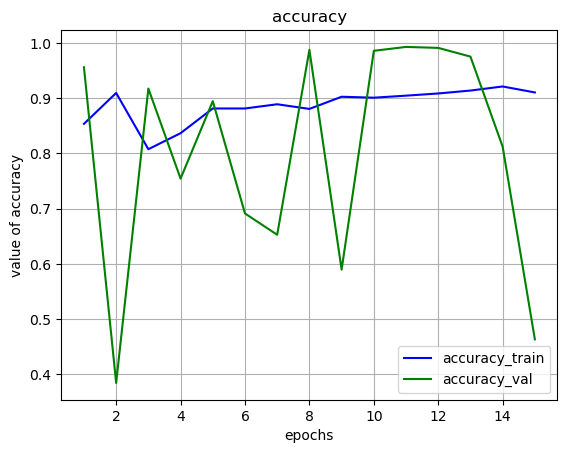

In [25]:
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label = 'accuracy_train')
plt.plot(epochs,acc_val,'g',label = 'accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show() 

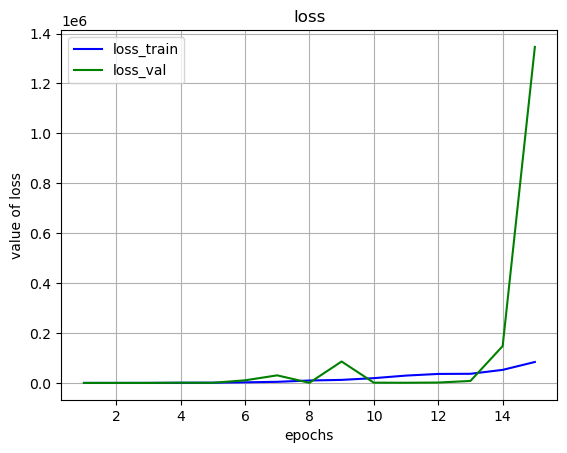

In [26]:
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'b', label='loss_train')
plt.plot(epochs, loss_val, 'g', label='loss_val')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('value of loss')
plt.legend()
plt.grid()
plt.show()

In [27]:
y_test_pred = model.predict (data_test_fft_nn)
y_test_pred= (y_test_pred > 0.5)

accuracy = accuracy_score(y_test, y_test_pred)
print("accuracy : ", accuracy)

 1/18 [>.............................] - ETA: 4s

2023-12-02 00:26:43.028086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 45ms/step
accuracy :  0.4631578947368421


                         precision    recall  f1-score   support

 NO exoplanet confirmed       0.99      0.47      0.63       565
YES exoplanet confirmed       0.00      0.20      0.01         5

               accuracy                           0.46       570
              macro avg       0.49      0.33      0.32       570
           weighted avg       0.98      0.46      0.63       570



<Axes: >

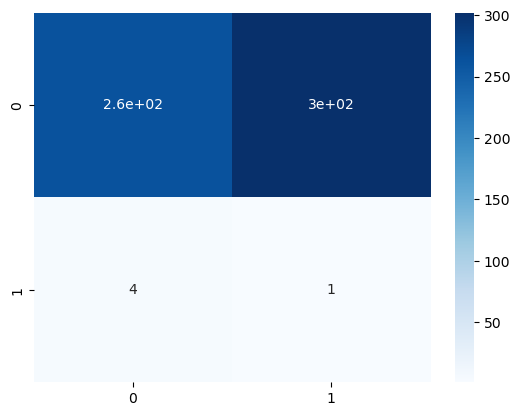

In [28]:
print(classification_report(y_test, y_test_pred, target_names=["NO exoplanet confirmed","YES exoplanet confirmed"]))

conf_matrix = confusion_matrix([int(x) for x in y_test ], [int(y) for y in y_test_pred ])
sns.heatmap(conf_matrix, annot=True, cmap='Blues')